Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.
✅ Classes: {'.git': 0, 'amla': 1, 'asopalav': 2, 'babul': 3, 'bamboo': 4, 'banyan': 5, 'bili': 6, 'cactus': 7, 'champa': 8, 'coconut': 9, 'garmalo': 10, 'gulmohor': 11, 'gunda': 12, 'jamun': 13, 'kanchan': 14, 'kesudo': 15, 'khajur': 16, 'mango': 17, 'motichanoti': 18, 'neem': 19, 'nilgiri': 20, 'other': 21, 'pilikaren': 22, 'pipal': 23, 'saptaparni': 24, 'shirish': 25, 'simlo': 26, 'sitafal': 27, 'sonmahor': 28, 'sugarcane': 29, 'vad': 30}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 31)                  │          39,711 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,297,695 (8.77 MB)

 Trainable params: 39,711 (155.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0658 - loss: 4.0991 - val_accuracy: 0.3313 - val_loss: 2.4766
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.2656 - loss: 2.6794 - val_accuracy: 0.4656 - val_loss: 2.0794
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4305 - loss: 2.0409 - val_accuracy: 0.5125 - val_loss: 1.7998
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5055 - loss: 1.7163 - val_accuracy: 0.5906 - val_loss: 1.6080
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5098 - loss: 1.6319 - val_accuracy: 0.5938 - val_loss: 1.5363
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5746 - loss: 1.4380 - val_accuracy: 0.6156 - val_loss: 1.4986
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6374 - loss: 1.2425 - val_accuracy: 0.6125 - val_loss: 1.4504
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6271 - loss: 1.2516 - val_accuracy: 0.6562 - val_loss:

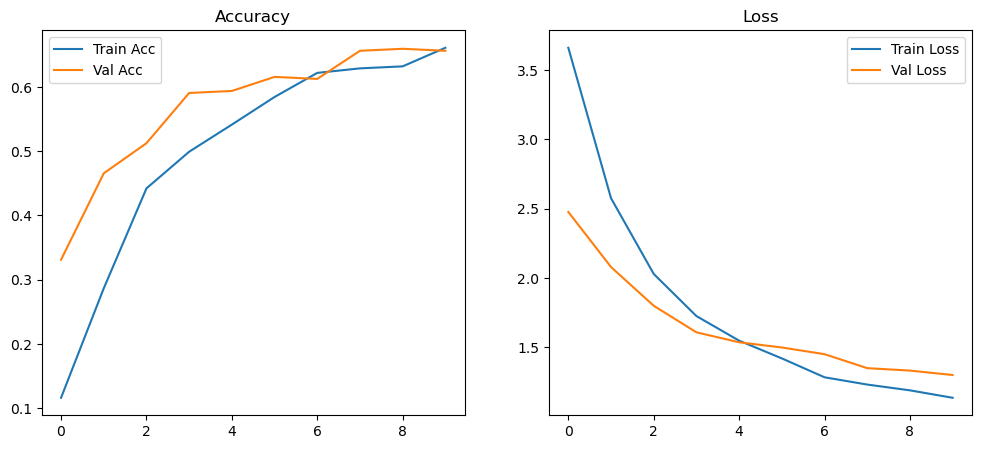

In [5]:
# ✅ 1) Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# ✅ 2) Settings
img_height, img_width = 224, 224  # MobileNetV2 prefers 224x224
batch_size = 32
data_dir =r"D:\ranjith\Tree_Species_Dataset"  # replace with your dataset folder

# ✅ 3) Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("✅ Classes:", train_data.class_indices)

# ✅ 4) Load Pretrained Base Model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False  # freeze the base

# ✅ 5) Add Custom Classification Head
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(train_data.num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ✅ 6) Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ✅ 7) Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)

# ✅ 8) Save
model.save("tree_classifier_mobilenetv2.keras")
print("✅ Model saved as 'tree_classifier_mobilenetv2.keras'")

# ✅ 9) Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()
